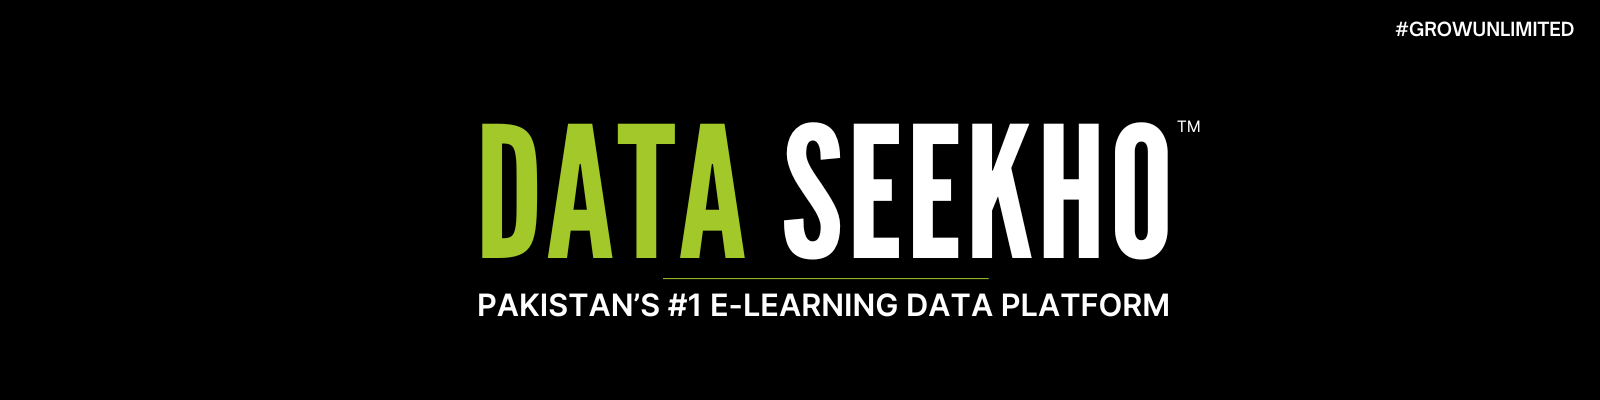


# **DATA SCIENCE AND MACHINE LEARNING BOOTCAMP**🤖💻🧠

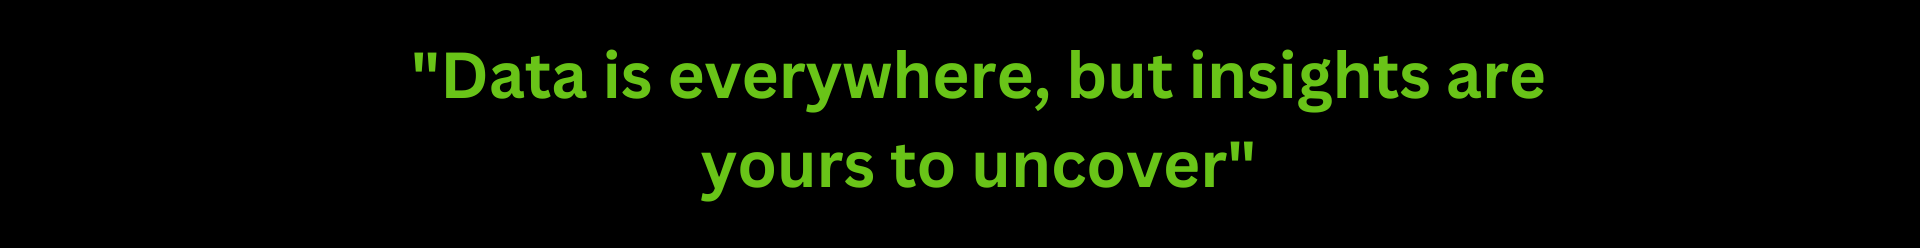

### 1. Why Data Cleaning Matters

#### **Why are we using it?**
Data cleaning is essential because raw data often contains errors, missing values, or inconsistencies that can distort analysis and lead to inaccurate predictions in machine learning models.

#### **Benefits:**


- **Improved Accuracy:** Clean data ensures that models are trained on accurate information, leading to more reliable predictions.

 **Better Performance:** Algorithms perform better when the data is consistent and free of noise or irrelevant information.

- **Time Efficiency:** Detecting and fixing data issues early saves time in later stages of analysis or modeling.



#### **Best Scenario:**


Data cleaning is necessary in almost every real-world dataset. It is particularly important in situations where you have collected data from multiple sources, which may introduce errors or discrepancies (e.g., a dataset from multiple stores with inconsistent formatting).


#### **Example with Explanation:**


In [1]:
import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, np.nan, 10],         # Missing value in 'ID'
    'Name': ['Alice', 'Bob', None, 'David', 'Eva', 'Frank', 'George', 'Hannah', 'Ivy', 'John'],  # Missing value in 'Name'
    'Age': [25, 30, np.nan, 'unknown', 22, 29, 35, 40, 19, 28],   # Missing and inconsistent values in 'Age'
    'Salary': [50000, 60000, np.nan, 45000, 52000, 58000, 'N/A', 400000, 49000, 51000],  # Outliers and missing in 'Salary'
    'Joining Date': ['2022-01-15', '2021-05-20', 'unknown', '2020-10-10', np.nan,
                     '2019-08-30', '2020-11-05', 'wrong_format', '2023-02-28', '2022-07-17'],  # Date format issues
    'Department': ['HR', 'Engineering', None, 'Marketing', 'HR', 'HR', 'Marketing', 'Engineering', 'Finance', np.nan]  # Missing values
}

# Create DataFrame
df = pd.DataFrame(data)
print("Original DataFrame:")
df.head()

Original DataFrame:


,ID,Name,Age,Salary,Joining Date,Department
0,1.0,Alice,25,50000,2022-01-15,HR
1,2.0,Bob,30,60000,2021-05-20,Engineering
2,3.0,None,NaN,NaN,unknown,None
3,4.0,David,unknown,45000,2020-10-10,Marketing
4,5.0,Eva,22,52000,NaN,HR


In [2]:
df.head(10)

,ID,Name,Age,Salary,Joining Date,Department
0,1.0,Alice,25,50000,2022-01-15,HR
1,2.0,Bob,30,60000,2021-05-20,Engineering
2,3.0,None,NaN,NaN,unknown,None
3,4.0,David,unknown,45000,2020-10-10,Marketing
4,5.0,Eva,22,52000,NaN,HR
5,6.0,Frank,29,58000,2019-08-30,HR
6,7.0,George,35,N/A,2020-11-05,Marketing
7,8.0,Hannah,40,400000,wrong_format,Engineering
8,NaN,Ivy,19,49000,2023-02-28,Finance
9,10.0,John,28,51000,2022-07-17,NaN


**Issues:**
- Missing values in the "Name", "Age", "Salary", "Joining Date", and "Department" columns.
- Missing entries could affect results during data analysis or training a model.


### 2. Handling Missing Values


#### **Why are we using it?**
Missing values are common in datasets, and leaving them unhandled can lead to errors during analysis or model training. Techniques for dealing with missing data ensure that you make the best use of available data without introducing bias or losing too much information.

#### **Benefits:**
- **Prevents Errors:** Missing values can break code or cause errors in algorithms that require complete data.
- **Maximizes Data Usage:** Rather than discarding entire rows or columns, filling in missing values allows you to retain as much data as possible.
- **Reduces Bias:** Filling values based on statistical methods helps prevent introducing bias from removing too many data points.


#### **Best Scenario:**
- **Remove Rows:** When only a small number of rows have missing values and their removal won’t significantly impact the analysis.
- **Fill Values:** In large datasets removing rows would result in losing important information or creating bias.
For example, if a dataset has missing ages, you can fill in the gaps with the average age.
- **Why?** This is useful when the number of missing values is small, and removing them doesn’t lose critical information.
- **Benefits:** Simplifies data handling by eliminating problematic rows.
- **Best Scenario:** When you have just a few missing entries that won’t affect overall results if removed.


In [ ]:
# Step 1: Replace None and 'N/A' with np.nan
df.replace({None: np.nan, 'N/A': np.nan}, inplace=True)
print("\nDataFrame after replacing None and 'N/A' with np.nan:")
print(df)


DataFrame after replacing None and 'N/A' with np.nan:
     ID    Name      Age    Salary  Joining Date   Department
0   1.0   Alice       25   50000.0    2022-01-15           HR
1   2.0     Bob       30   60000.0    2021-05-20  Engineering
2   3.0     NaN      NaN       NaN       unknown          NaN
3   4.0   David  unknown   45000.0    2020-10-10    Marketing
4   5.0     Eva       22   52000.0           NaN           HR
5   6.0   Frank       29   58000.0    2019-08-30           HR
6   7.0  George       35       NaN    2020-11-05    Marketing
7   8.0  Hannah       40  400000.0  wrong_format  Engineering
8   NaN     Ivy       19   49000.0    2023-02-28      Finance
9  10.0    John       28   51000.0    2022-07-17          NaN


<ipython-input-31-2fe0b95c71fe>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({None: np.nan, 'N/A': np.nan}, inplace=True)


In [ ]:
# Step 2: Convert 'ID' to numeric
df['ID'] = pd.to_numeric(df['ID'], errors='coerce')

# Step 3: Convert 'Age' to numeric and handle invalid entries
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Step 4: Convert 'Salary' to numeric
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Step 5: Handle 'Joining Date' by converting valid dates to datetime, invalid to NaT
df['Joining Date'] = pd.to_datetime(df['Joining Date'], errors='coerce')

# Step 6: Fill missing values for 'Name' with a placeholder
df['Name'] = df['Name'].fillna('Unknown')


print("\nDataFrame after cleaning:")
print(df)


DataFrame after cleaning:
     ID     Name   Age    Salary Joining Date   Department
0   1.0    Alice  25.0   50000.0   2022-01-15           HR
1   2.0      Bob  30.0   60000.0   2021-05-20  Engineering
2   3.0  Unknown   NaN       NaN          NaT          NaN
3   4.0    David   NaN   45000.0   2020-10-10    Marketing
4   5.0      Eva  22.0   52000.0          NaT           HR
5   6.0    Frank  29.0   58000.0   2019-08-30           HR
6   7.0   George  35.0       NaN   2020-11-05    Marketing
7   8.0   Hannah  40.0  400000.0          NaT  Engineering
8   NaN      Ivy  19.0   49000.0   2023-02-28      Finance
9  10.0     John  28.0   51000.0   2022-07-17          NaN


#### **Finding Missing Values**
To find missing values in your dataset, you can use the `.isnull()` method in Pandas:


# Check for missing values


This tells us that there are missing values in the "Name", "Age", and "Salary" columns.
- **Why?** When missing data is significant, it’s better to fill those gaps using mean, median, or mode instead of removing rows.
- **Benefits:** Retains most of the dataset, minimizing data loss and improving model performance.
- **Best Scenario:** When working with large datasets where removing rows with missing values would remove too much data.


#### **Fixing Missing Values**
There are several ways to handle missing values:


In [3]:
df

,ID,Name,Age,Salary,Joining Date,Department
0,1.0,Alice,25,50000,2022-01-15,HR
1,2.0,Bob,30,60000,2021-05-20,Engineering
2,3.0,None,NaN,NaN,unknown,None
3,4.0,David,unknown,45000,2020-10-10,Marketing
4,5.0,Eva,22,52000,NaN,HR
5,6.0,Frank,29,58000,2019-08-30,HR
6,7.0,George,35,N/A,2020-11-05,Marketing
7,8.0,Hannah,40,400000,wrong_format,Engineering
8,NaN,Ivy,19,49000,2023-02-28,Finance
9,10.0,John,28,51000,2022-07-17,NaN


In [ ]:
missing_values = df.isnull().sum()

print(missing_values)

ID              1
Name            0
Age             2
Salary          2
Joining Date    3
Department      2
dtype: int64


**1. Remove Rows with Missing Values**
Sometimes, it makes sense to remove rows with missing data if the number of missing rows is small.


# Drop rows with missing values


In this case, rows where "Name" or "Salary" were missing are dropped. However, removing data isn't always ideal, especially if a significant portion of the data is missing.


In [ ]:
0 100 = 50
0 100 1000 = 500
-1000 0 100 = -500

In [ ]:
# Drop rows where 'Age' or 'Salary' has missing values
df_cleaned_specific = df.dropna(subset=['ID', 'Name'])
print(df_cleaned_specific)

     ID     Name   Age    Salary Joining Date   Department
0   1.0    Alice  25.0   50000.0   2022-01-15           HR
1   2.0      Bob  30.0   60000.0   2021-05-20  Engineering
2   3.0  Unknown   NaN       NaN          NaT          NaN
3   4.0    David   NaN   45000.0   2020-10-10    Marketing
4   5.0      Eva  22.0   52000.0          NaT           HR
5   6.0    Frank  29.0   58000.0   2019-08-30           HR
6   7.0   George  35.0       NaN   2020-11-05    Marketing
7   8.0   Hannah  40.0  400000.0          NaT  Engineering
9  10.0     John  28.0   51000.0   2022-07-17          NaN


## 3. **Dealing with Outliers**

#### **Why are we using it?**
Outliers are extreme values that deviate significantly from other data points. These can skew results and lead to inaccurate analysis or misleading model performance. By identifying and dealing with outliers, we ensure more accurate and reliable insights.



#### **Benefits:**
- **Increased Accuracy:** Removing or handling outliers ensures that the model isn’t skewed by abnormal data points.
- **Improved Model Performance:** Outliers can affect metrics like mean or standard deviation, which in turn impacts model results. By removing them, you get better training data.
- **Robust Analysis:** Outlier handling ensures that statistical measures (e.g., mean) are more.



#### **Best Scenario:**
Outliers should be handled when:
- They are errors or anomalies in data (e.g., a temperature reading of 1000°C).
- They significantly skew statistical results, such as calculating the average income in a region where a few individuals earn significantly more than the majority.



- **Why?** Box plots help visualize extreme values. Outliers are easy to spot because they appear as points outside the “box.”
- **Benefits:** Quickly and visually identifies abnormal data points.
- **Best Scenario:** Use when you want to easily spot potential outliers in numerical data.

#### **Handling and Removing Outliers**
You can remove outliers by using statistical methods like the

**Interquartile Range (IQR)**. This method works by identifying values that lie far outside the range of most data points.
- **Why?** The Interquartile Range (IQR) is a reliable method for identifying and removing outliers that lie far beyond the normal distribution of the data.
- **Benefits:** Improves the accuracy of models and statistical analyses by eliminating misleading values.
- **Best Scenario:** When working with datasets where extreme values affect averages and standard deviations, e.g., salary data or housing prices.


#### **Example with Explanation:**



- **Spotting Outliers:**
A common way to spot outliers is by using a **box plot**. A box plot visually displays the distribution of data and highlights the outliers.

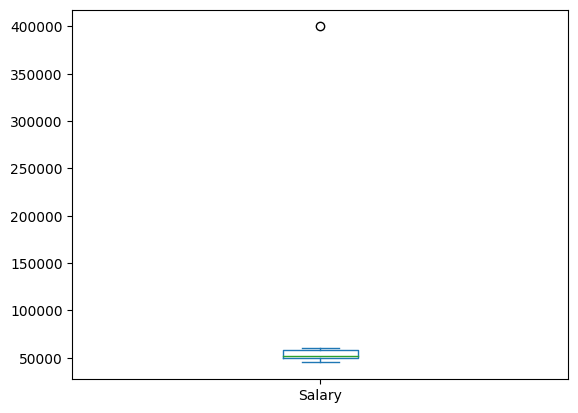

In [ ]:
import matplotlib.pyplot as plt

# Create a box plot for the Salary column

df['Salary'].plot(kind='box')
plt.show()


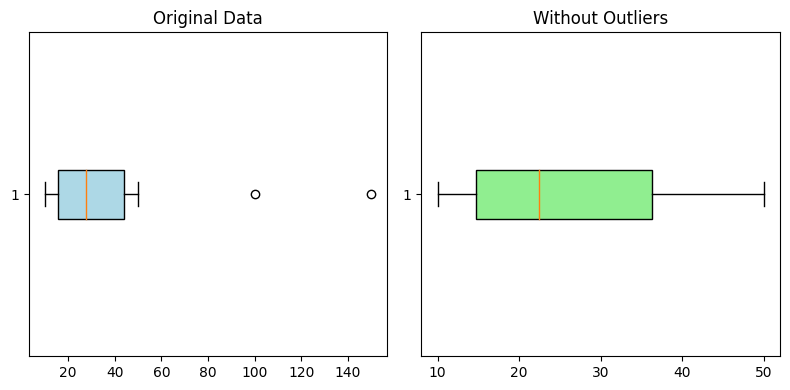

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Simple data example
data = {'Values': [10, 12, 14, 15, 18, 20, 25, 30, 35, 40, 45, 50, 100, 150]}
df1 = pd.DataFrame(data)

# Calculate the 1st and 3rd quartiles (Q1 and Q3)
Q1 = df1['Values'].quantile(0.25)  # 25th percentile
Q3 = df1['Values'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1                     # Interquartile Range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
df_no_outliers = df1[(df1['Values'] >= lower_bound) & (df1['Values'] <= upper_bound)]

# Plot box plots
plt.figure(figsize=(8,4))

# Original data with outliers
plt.subplot(1, 2, 1)  # First subplot
plt.boxplot(df1['Values'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Original Data')

# Data without outliers
plt.subplot(1, 2, 2)  # Second subplot
plt.boxplot(df_no_outliers['Values'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Without Outliers')

plt.tight_layout()  # Adjust layout
plt.show()


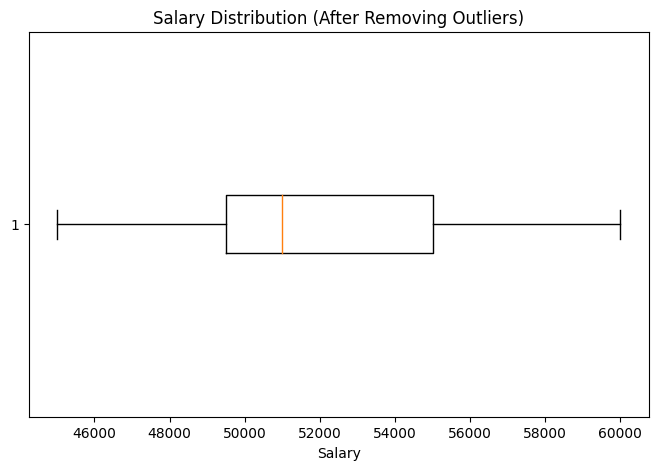

In [ ]:
# Remove outliers using the IQR method
Q1 = df['Salary'].quantile(0.25)  # 1st Quartile
Q3 = df['Salary'].quantile(0.75)  # 3rd Quartile
IQR = Q3 - Q1  # Interquartile Range

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

# Create a box plot for salaries after removing outliers
plt.figure(figsize=(8, 5))
plt.boxplot(df_no_outliers['Salary'], vert=False)
plt.title('Salary Distribution (After Removing Outliers)')
plt.xlabel('Salary')
plt.show()

**2. Fill Missing Values**

Another common approach is to fill in missing values using statistical methods like mean, median, or mode.


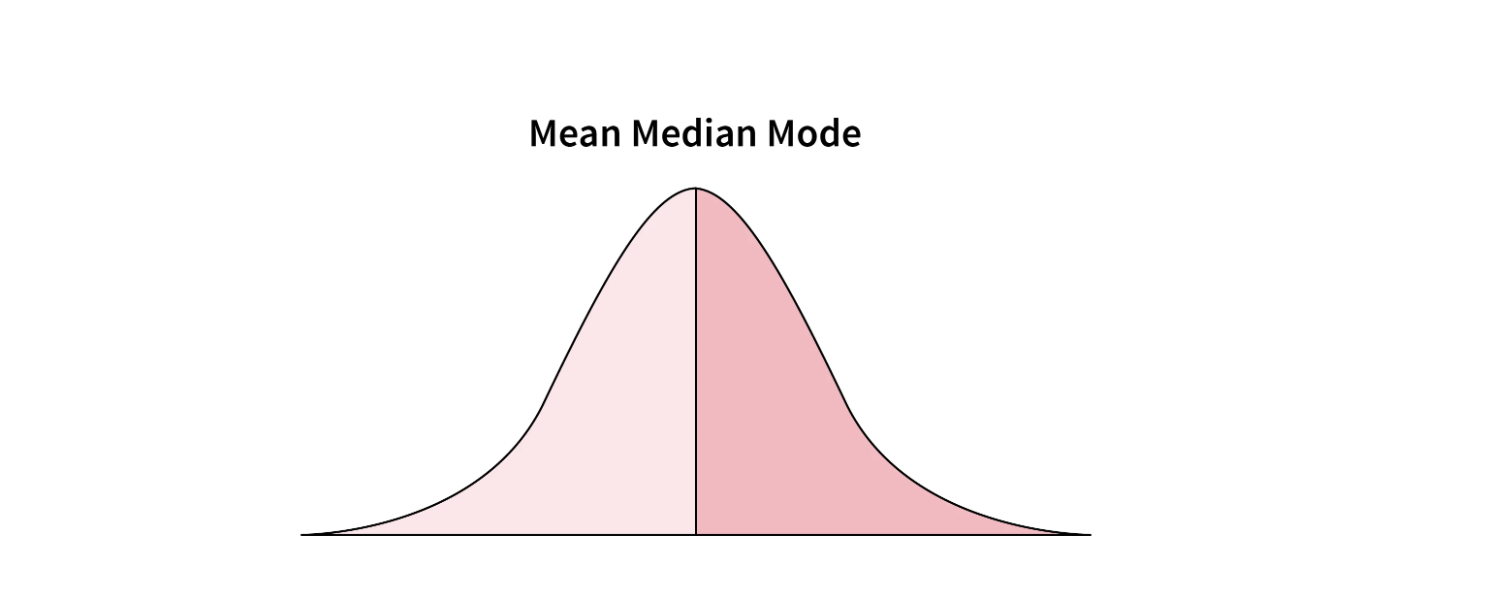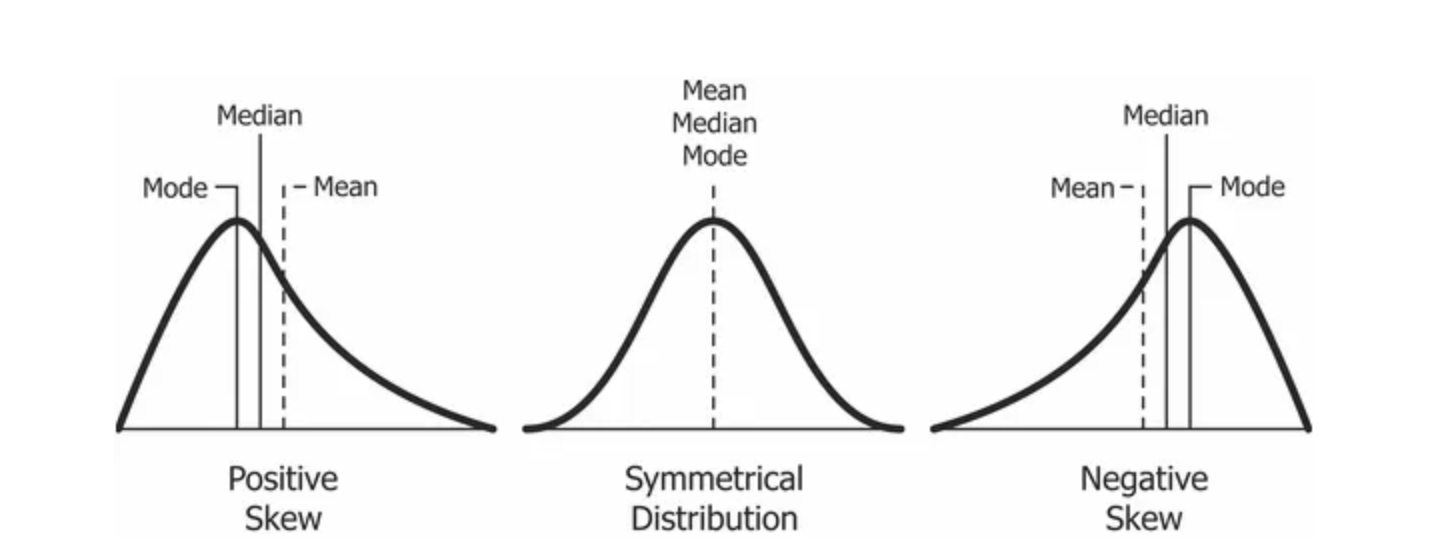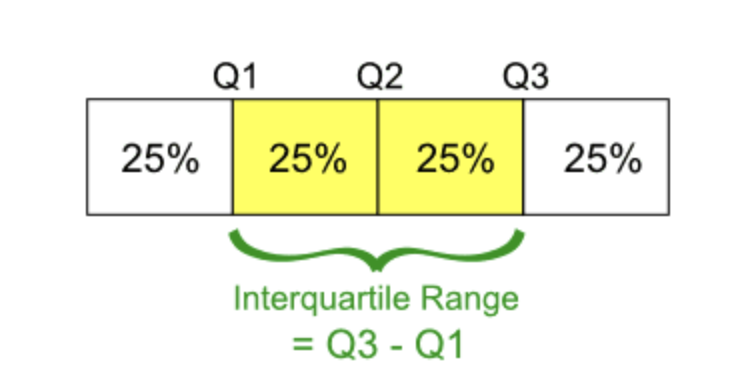

- Positive Skew: Mean > Median > Mode
- Negative Skew: Mean < Median < Mode
- Symmetrical Distribution: Mean = Median = Mode

- **Fill missing ages with the average age:**


In [ ]:
# Fill missing Age with the mean value

df['Age'] = df['Age'].fillna(df['Age'].mean())
df.head()

,Name,Age,Salary
0,Alice,24.00,50000.0
1,Bob,26.25,60000.0
2,None,29.00,59000.0
3,David,22.00,58000.0
4,Eve,30.00,62000.0


- **Fill missing Salary with the median:**





In [ ]:
# Fill missing Salary with the median value

df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df.head()

,ID,Name,Age,Salary,Joining Date,Department
0,1.0,Alice,25.0,50000.0,2022-01-15,HR
1,2.0,Bob,30.0,60000.0,2021-05-20,Engineering
2,3.0,Unknown,NaN,51500.0,NaT,NaN
3,4.0,David,NaN,45000.0,2020-10-10,Marketing
4,5.0,Eva,22.0,52000.0,NaT,HR


- **Fill missing Department with the mode:**





In [ ]:
# Fill missing Dep with the mode value

df['Department'] = df['Department'].fillna(df['Department'].mode())
df.head()

,ID,Name,Age,Salary,Joining Date,Department
0,1.0,Alice,25.0,50000.0,2022-01-15,HR
1,2.0,Bob,30.0,60000.0,2021-05-20,Engineering
2,3.0,Unknown,NaN,NaN,NaT,HR
3,4.0,David,NaN,45000.0,2020-10-10,Marketing
4,5.0,Eva,22.0,52000.0,NaT,HR


### 4. Encoding Categorical Variables

### Types of Categorical Variables
1. **Nominal Variables**: Categories with no inherent order (e.g., color, city).
2. **Ordinal Variables**: Categories with a specific order (e.g., rating levels, education levels).


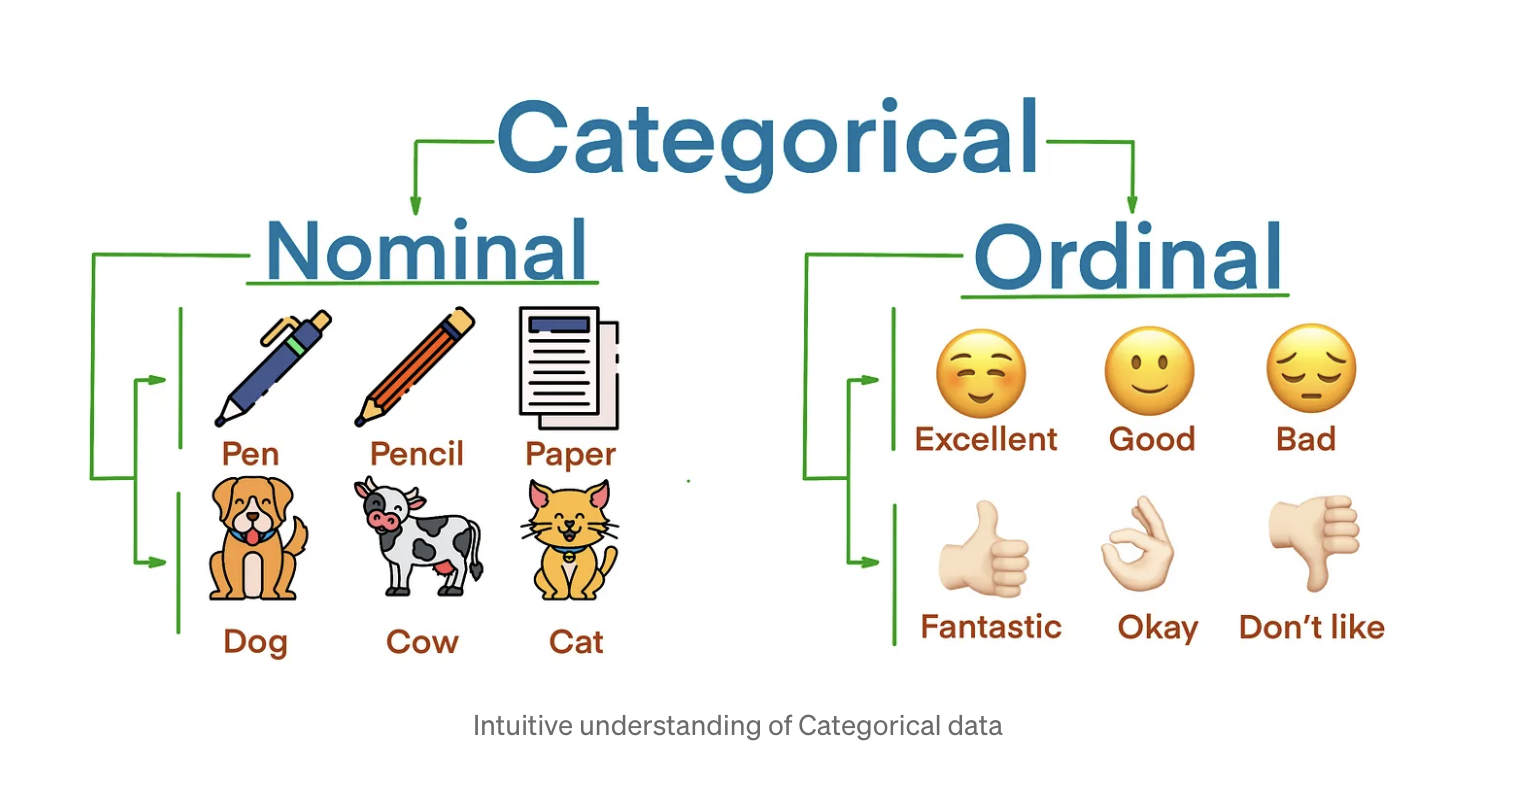

Categorical variables (like "City", "Gender") need to be converted into numerical values before being used in machine learning models.

 There are two common ways to do this: **Label Encoding** and **One-Hot Encoding**.


#### **Why are we using it?**
Machine learning models require numerical input, but many datasets contain categorical variables (e.g., city names, product types). Converting these into numerical formats enables the algorithms to process and analyze them.


#### **Benefits:**
- **Model Compatibility:** Algorithms like decision trees or regression models can only work with numerical inputs, so encoding categorical data is essential.
- **Preserve Information:** Encodes categorical data without losing any important information about the dataset.
- **Improves Model Performance:** Properly encoded categorical variables improve the model’s ability to learn from the data and make predictions.


#### **Best Scenario:**
- **Label Encoding:** Best for ordinal variables (variables that have an inherent order, such as "low", "medium", "high").
- **One-Hot Encoding:** Ideal for nominal variables (variables that don’t have a specific order, like "city" or "color"). One-hot encoding works best when there are a small number of categories because it creates a new column for each category.


### Common Encoding Techniques


#### 1. **Label Encoding**
**Definition**: Converts each category into a unique integer.

**When to Use**: Best suited for ordinal variables, where the order matters.

**Example**: Suppose we have a dataset with a column for education levels:

| Education Level |
|------------------|
| High School |
| Bachelor's |
| Master's |
| PhD |
**Encoding**:
- High School: 0
- Bachelor's: 1
- Master's: 2
- PhD: 3


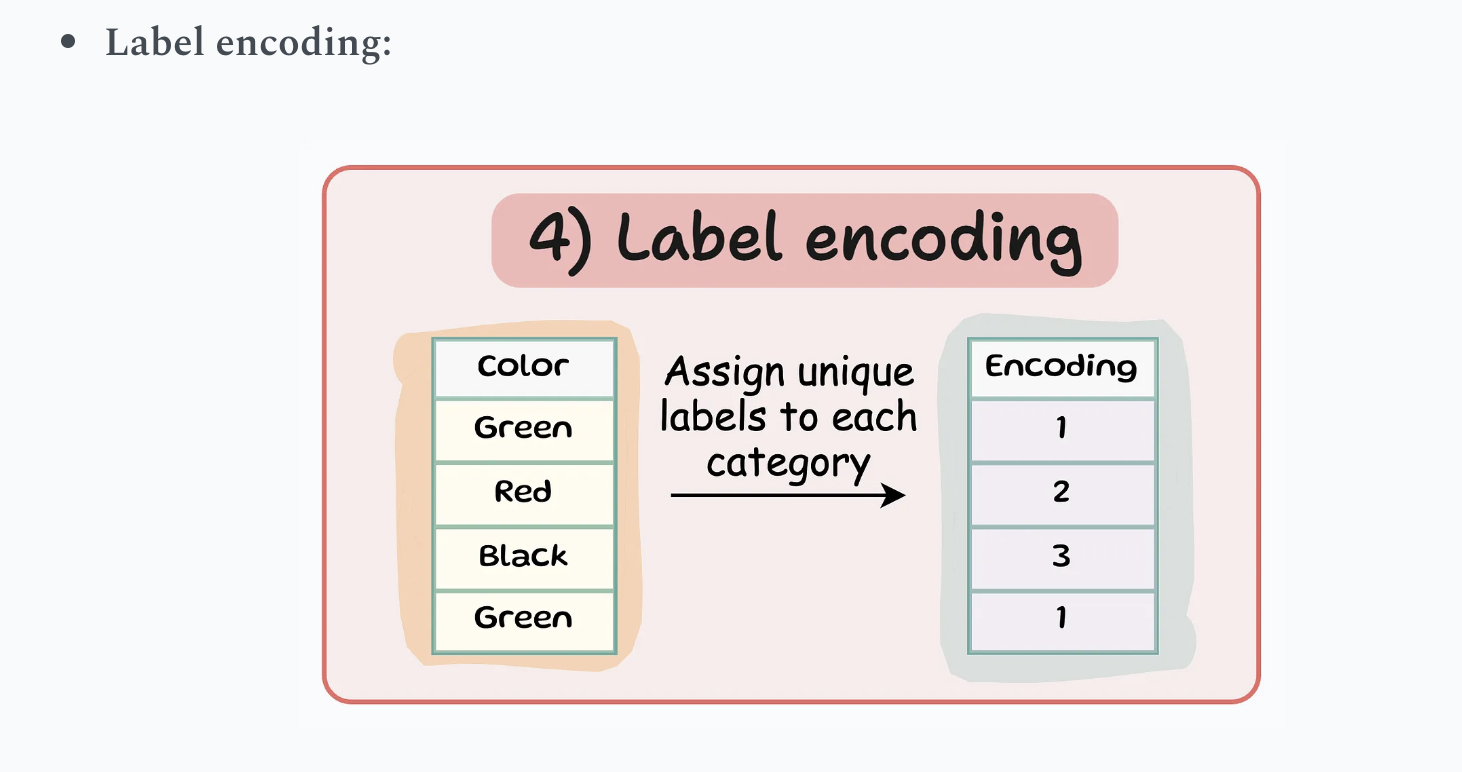

#### **Example with Explanation:**


- **Label Encoding:**
Label encoding assigns each unique category a number.
- **Why?** Label encoding assigns a unique number to each category. This is useful when the categorical data has an inherent order (e.g., "low", "medium", "high").
- **Benefits:** Simple and efficient, especially when dealing with binary or ordinal categories.
- **Best Scenario:** When working with ordinal data that has a meaningful order, such as ratings or size categories.


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame

data = {'Education Level': ['High School', 'Bachelor\'s', 'Master\'s', 'PhD']}
df = pd.DataFrame(data)
# Instantiate LabelEncoder

label_encoder = LabelEncoder()

# Perform Label Encoding

df['Education Level Encoded'] = label_encoder.fit_transform(df['Education Level'])
df.head()

,Education Level,Education Level Encoded
0,High School,1
1,Bachelor's,0
2,Master's,2
3,PhD,3


In [ ]:
data = {'Name': ['Alice', 'Bob', 'David', 'Eve'],
'Gender': ['Female', 'Male', 'Male', 'Female']}
df = pd.DataFrame(data)

# Apply Label Encoding

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [ ]:
df.head()

,Name,Gender
0,Alice,0
1,Bob,1
2,David,1
3,Eve,0


- **One-Hot Encoding:**


**Definition**: Converts each category into a binary column (0s and 1s), creating a new column for each category.

**When to Use**: Best suited for nominal variables, where there is no ordinal relationship.

**Example**: Suppose we have a dataset with a column for colors:

| Color |
|---------|
| Red |
| Green |
| Blue |
**Encoding**:
- Red: [1, 0, 0]
- Green: [0, 1, 0]
- Blue: [0, 0, 1]


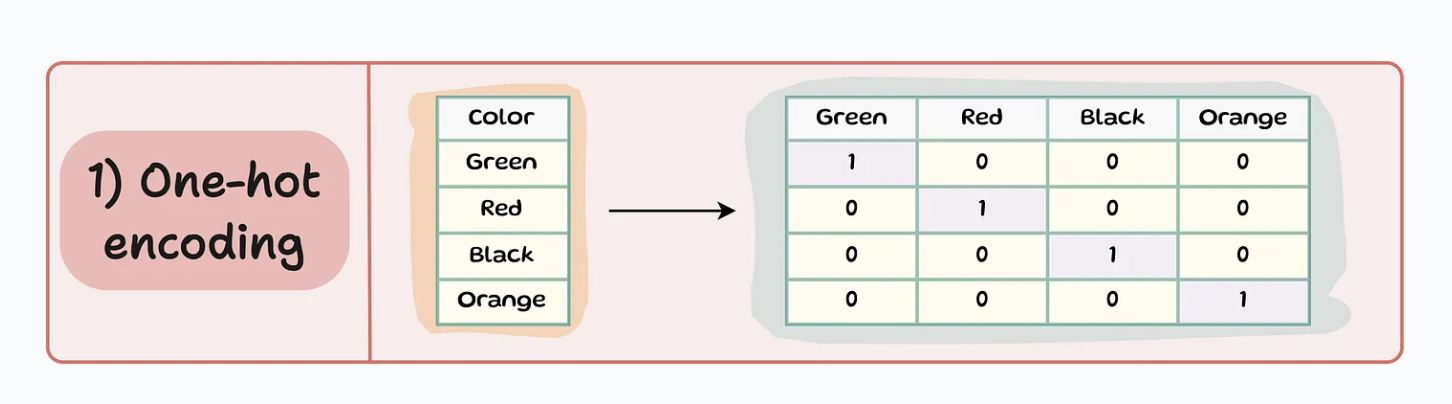

In [ ]:
import pandas as pd

# Sample data
data = {
    'ID': [1, 2, 3, 4, 5],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Department': ['HR', 'Engineering', 'HR', 'Marketing', 'Engineering']
}

df = pd.DataFrame(data)
print("Original DataFrame:")
df.head()  # Changed to print the DataFrame directly

Original DataFrame:


,ID,Name,Department
0,1,Alice,HR
1,2,Bob,Engineering
2,3,Charlie,HR
3,4,David,Marketing
4,5,Eva,Engineering


In [ ]:
# Apply One-Hot Encoding to the 'Department' column
df_encoded = pd.get_dummies(df, columns=['Department'])

print("\nDataFrame after One-Hot Encoding (Department only):")
df_encoded.head(10)  # Changed to print the DataFrame directly


DataFrame after One-Hot Encoding (Department only):


,ID,Name,Department_Engineering,Department_HR,Department_Marketing
0,1,Alice,False,True,False
1,2,Bob,True,False,False
2,3,Charlie,False,True,False
3,4,David,False,False,True
4,5,Eva,True,False,False


One-hot encoding is a more sophisticated method that creates binary columns for each category. Each column represents a category, and the value is 1 if the category is present in that row and 0 otherwise.


- **Why?** One-hot encoding creates binary columns for each category, representing whether that category exists in a given row.
- **Benefits:** It preserves the categorical information without introducing any assumptions about the order or relationships between categories.
- **Best Scenario:** Ideal for non-ordinal categories (e.g., "City", "Gender"). Use when the number of unique categories is not too large, as one-hot encoding adds additional columns to the dataset.


In [ ]:
# Sample data with categorical variable

data = {'Name': ['Alice', 'Bob', 'David', 'Eve'],
'City': ['New York', 'Paris', 'London', 'New York']}
df = pd.DataFrame(data)

# Apply One-Hot Encoding

df_encoded = pd.get_dummies(df, columns=['City'])
print(df_encoded)


    Name  City_London  City_New York  City_Paris
0  Alice        False           True       False
1    Bob        False          False        True
2  David         True          False       False
3    Eve        False           True       False


Here, the "City" column is split into three columns: one for each city ("London", "New York", "Paris"), and the rows have a binary value indicating whether the city is present in that row.

# **🎯 Day 2 Complete! Well Done! 🎯**
You've successfully finished the second day of our Data Science and Machine Learning Bootcamp! 🚀

Today, you laid the foundation for an exciting journey ahead, and there’s so much more to explore.

# **🌟 What You’ve Achieved:**
Introduced to key concepts in data science and machine learning 📊🤖

Gained hands-on experience with coding challenges 💻

Took the first step towards becoming a data expert! 🚀

# **Get Ready for Day 3! 💪**
Tomorrow, we dive deeper! Stay motivated and come prepared to level up your skills.

More exciting challenges and insights are waiting for you! 🔥

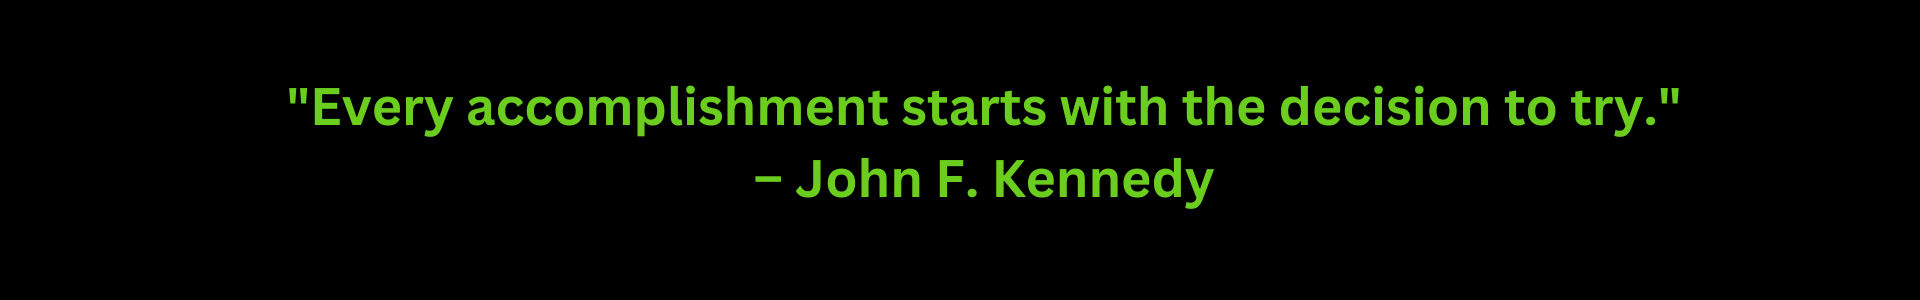